In [1]:
import numpy as np

q_star = np.ones(10)

class k_arm_bandit():
    def __init__(self, k = 10, q_star =np.zeros(10,dtype=np.float32)):
        self.k = k
        self.q_star = q_star
        self.q_est = np.zeros_like(self.q_star)
        self.r = np.zeros((k,2000),dtype=np.float32)
        self.action_count = np.ones_like(self.q_est)
    def action_update(self,alpha=1,eps=None):
        opt_action = np.argmax(self.q_star)
        if np.random.rand() > eps is not None:
            a = np.argmax(self.q_est)
        else:
            a = np.random.choice(len(self.q_star))

        r_t = np.random.normal(loc = self.q_star[a]) #R_{t}
        
        self.action_count[a] +=1
        self.q_est[a] = self.q_est[a] + alpha[a]*(r_t-self.q_est[a])

        self.q_star += np.random.normal(scale=0.01,size = self.q_star.shape)

        return r_t,int(a==opt_action) 

T = 5000
r_dic = {'avg-greedy':np.zeros((T)),'avg-eps':np.zeros((T)),
         'const-greedy':np.zeros((T)),'const-eps':np.zeros((T))}
opt_dic = {k:np.zeros(T) for k in r_dic}

for alph in ['avg','const']:
    for eps in [0, 0.1]:
        if eps ==0:
            key = alph+'-greedy'
        else:
            key = alph+'-eps'
        for run in range(2000):
            # B = k_arm_bandit(q_star = [0.1,0.5,1.1,0.3,0.01,0.4,0.44,0.33,0.29,0.11])
            B = k_arm_bandit()
            
            for t in range(T):
                # B.mod()
                if alph == 'avg':
                    r,opt_act_yes = B.action_update(alpha=1/B.action_count,eps=eps)
                else:
                    r,opt_act_yes = B.action_update(alpha=np.array([0.1]*10),eps=eps)
                r_dic[key][t] += r/2000
                opt_dic[key][t]+=opt_act_yes/2000


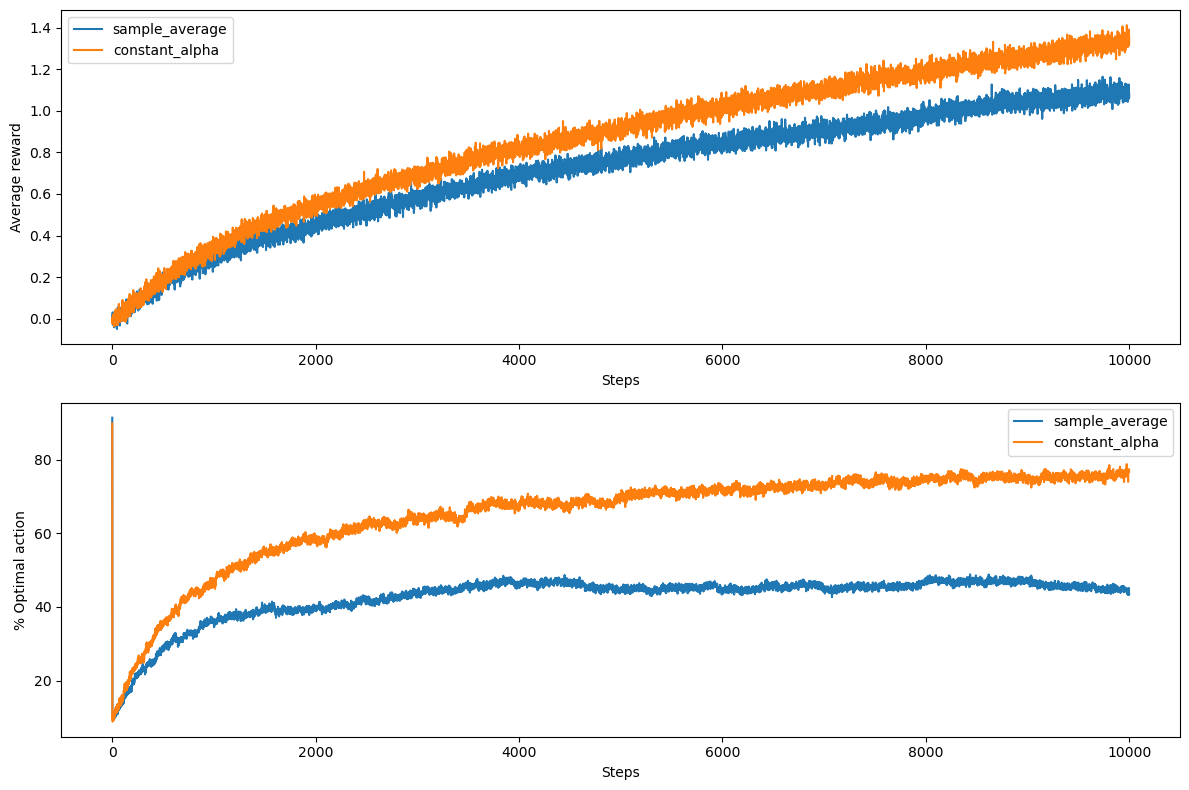

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class k_arm_bandit():
    def __init__(self, k = 10, initial_value = 0):
        self.k = k
        self.q_star = np.full(k, initial_value)
        self.q_star = np.full(k, initial_value, dtype=float)  # Make sure it's float
        self.q_est = np.zeros(k, dtype=float)  # Make sure it's float
        self.action_counts = np.zeros(k)
    def action_update(self, alpha, eps):
        # Epsilon-greedy action selection
        if np.random.rand() < eps:
            a = np.random.choice(self.k)
        else:
            a = np.argmax(self.q_est)

        # Get reward
        r = np.random.normal(self.q_star[a])

        # Update action value estimate
        self.q_est[a] += alpha[a] * (r - self.q_est[a])

        # Update action counts
        self.action_counts[a] += 1

        # Check if action is optimal
        is_optimal = (a == np.argmax(self.q_star))

        # Random walk of true action values
        self.q_star += np.random.normal(0, 0.01, size=self.k)

        return r, is_optimal

num_runs = 2000
num_steps = 10000
eps = 0.1

rewards = {'sample_average': np.zeros((num_runs, num_steps)),
           'constant_alpha': np.zeros((num_runs, num_steps))}
optimal_actions = {'sample_average': np.zeros((num_runs, num_steps)),
                   'constant_alpha': np.zeros((num_runs, num_steps))}

for run in range(num_runs):
    bandits = {'sample_average': k_arm_bandit(),
               'constant_alpha': k_arm_bandit()}

    for step in range(num_steps):
        for method in ['sample_average', 'constant_alpha']:
            if method == 'sample_average':
                alpha = 1 / np.maximum(bandits[method].action_counts, 1)  # avoid division by zero
            else:  # 'constant_alpha'
                alpha = np.full(bandits[method].k, 0.1)

            r, is_optimal = bandits[method].action_update(alpha, eps)

            rewards[method][run, step] = r
            optimal_actions[method][run, step] = is_optimal

# Calculate average reward and percentage of optimal actions over runs
avg_rewards = {method: np.mean(rewards[method], axis=0) for method in rewards}
optimal_action_percents = {method: np.mean(optimal_actions[method], axis=0) * 100 for method in optimal_actions}

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for method in avg_rewards:
    plt.plot(avg_rewards[method], label=method)
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

plt.subplot(2, 1, 2)
for method in optimal_action_percents:
    plt.plot(optimal_action_percents[method], label=method)
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.tight_layout()
plt.show()


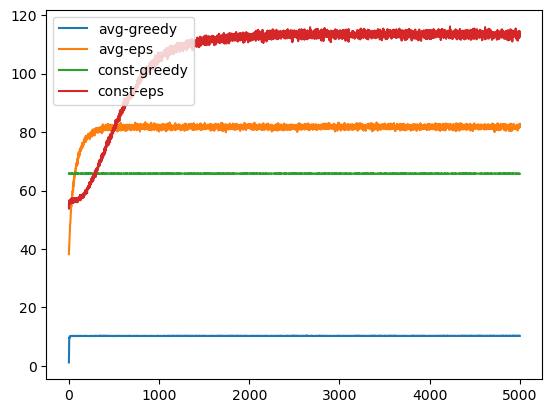

In [2]:
import matplotlib.pyplot as plt
for k in r_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(r_dic[k],label=k)
plt.legend(loc='best')
plt.show()


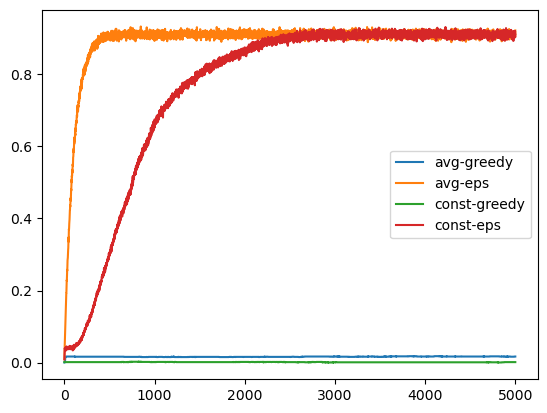

In [3]:
import matplotlib.pyplot as plt
for k in opt_dic:
    # plt.scatter(x=np.arange(len(r_dic[k])),y=r_dic[k],label=k)
    # plt.legend(loc='best')
    # plt.show()
    plt.plot(opt_dic[k],label=k)
plt.legend(loc='best')
plt.show()
